In [2]:
from egcd import egcd

In [3]:
pip install egcd


Note: you may need to restart the kernel to use updated packages.


In [2]:
def dd(x):
    if x < 0 : 
        x += 11
    if x % 2 == 1: 
        x += 11
    return x

I = [ dd(egcd(_,11)[1]) for _ in range(1,11)]


In [3]:
F = [ dd(-2*x % 11) for x in I]

In [4]:
def L2R(L):
    return '& ' + ' & '.join([str(_) for _ in L]) + ' \\\\'

In [5]:
print('\n'.join([ L2R(range(1,11)), L2R(I), L2R(F)] )) 

& 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
& 12 & 6 & 4 & 14 & 20 & 2 & 8 & 18 & 16 & 10 \\
& 20 & 10 & 14 & 16 & 4 & 18 & 6 & 8 & 12 & 2 \\


In [36]:
print(L2R(range(2,22, 2)))

& 2 & 4 & 6 & 8 & 10 & 12 & 14 & 16 & 18 & 20 \\


In [4]:
import numpy as np

def Farey(n):
    F_n = np.array([[0,1], [1,1]])
    for k in range(n):
        tmp = np.zeros((2*F_n.shape[0]-1, 2))
        # copy F_n in 
        tmp[::2,] = F_n
        # add medians in
        tmp[1::2,] = F_n[:-1] + F_n[1:]
        F_n = tmp
    return F_n

QQ = Farey(4)

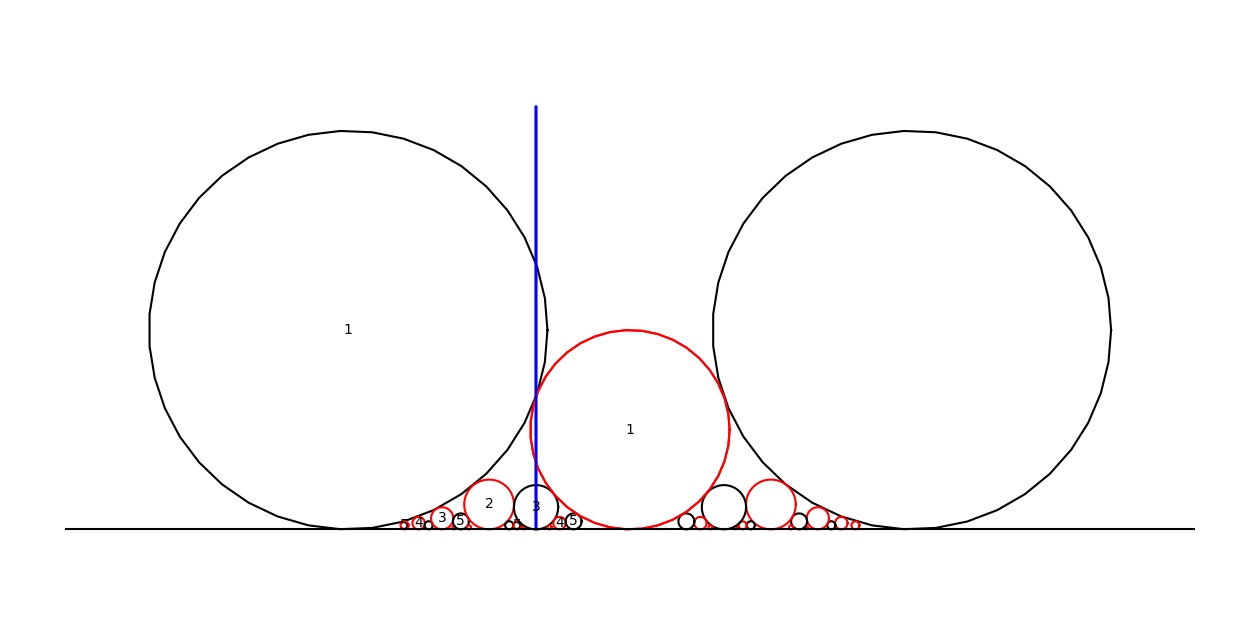

In [6]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(16,8)
ax.axis('equal')
ax.axis('off')

T = np.linspace(0,2*np.pi, 40)
motif = np.exp(1J*T)/2
SCALE = 200
data = []
for vv in QQ[:]:
    col = 'k'
    stroke = "#000000"
    r = np.sqrt(2)/vv[1]**2
    if vv[0] % 2 == 1 : 
        r /= 2
        col = 'r'
        stroke = "#FF0000"
    mm  = r*motif 
    cx = vv[0]/vv[1]
    cy = .5*r

    plt.plot(mm.real + cx, 
             mm.imag + cy ,col);

    if vv[1] < 6:
        ax.annotate(
            str(int(vv[1])),
            xy=(cx, cy), 
            xytext=(3, -5),
            textcoords='offset points', ha='right', va='bottom',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
        )
    
    plt.plot(mm.real + 2 -  vv[0]/vv[1], 
             mm.imag + .5*r,col);

    plt.plot([2/3]*2,[0,1.5],'b')

   
    r *= SCALE/2
    cx = SCALE*cx + 2*SCALE
    cy *= SCALE

    gg = f'<circle cx="{cx:.2f}" cy="{cy:.2f}" r="{r:.2f}" fill ="none" stroke = "{stroke}"/>'
    data.append(gg)
    cx = 4*SCALE - cx
    data.append(gg)
    
plt.plot([-1,3],[0,0],'k');
#plt.savefig('farey_mod.png')

ss = '''<svg viewBox="0 0 1000 1000" xmlns="http://www.w3.org/2000/svg">
  {}
</svg>'''.format('\n'.join(data))
with open('pp.svg','w') as fp:
    fp.write(ss)

In [58]:
data

['<circle cx="400.00" cy="141.42" r="141.42" fill ="none" stroke = "#00000"/>',
 '<circle cx="400.00" cy="141.42" r="141.42" fill ="none" stroke = "#00000"/>',
 '<circle cx="440.00" cy="2.83" r="2.83" fill ="none" stroke = "#FF000"/>',
 '<circle cx="360.00" cy="2.83" r="2.83" fill ="none" stroke = "#FF000"/>',
 '<circle cx="450.00" cy="4.42" r="4.42" fill ="none" stroke = "#FF000"/>',
 '<circle cx="350.00" cy="4.42" r="4.42" fill ="none" stroke = "#FF000"/>',
 '<circle cx="457.14" cy="2.89" r="2.89" fill ="none" stroke = "#00000"/>',
 '<circle cx="342.86" cy="2.89" r="2.89" fill ="none" stroke = "#00000"/>',
 '<circle cx="466.67" cy="7.86" r="7.86" fill ="none" stroke = "#FF000"/>',
 '<circle cx="333.33" cy="7.86" r="7.86" fill ="none" stroke = "#FF000"/>',
 '<circle cx="475.00" cy="1.10" r="1.10" fill ="none" stroke = "#FF000"/>',
 '<circle cx="325.00" cy="1.10" r="1.10" fill ="none" stroke = "#FF000"/>',
 '<circle cx="480.00" cy="5.66" r="5.66" fill ="none" stroke = "#00000"/>',
 '<c

In [48]:
ss = '''<svg viewBox="0 0 100 100" xmlns="http://www.w3.org/2000/svg">
  {}
</svg>'''.format('\n'.join(data))
with open('pp.svg','w') as fp:
    fp.write(ss)